Original Data Columns: Index(['Date', 'Fremont Bridge Sidewalks, south of N 34th St Total',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')


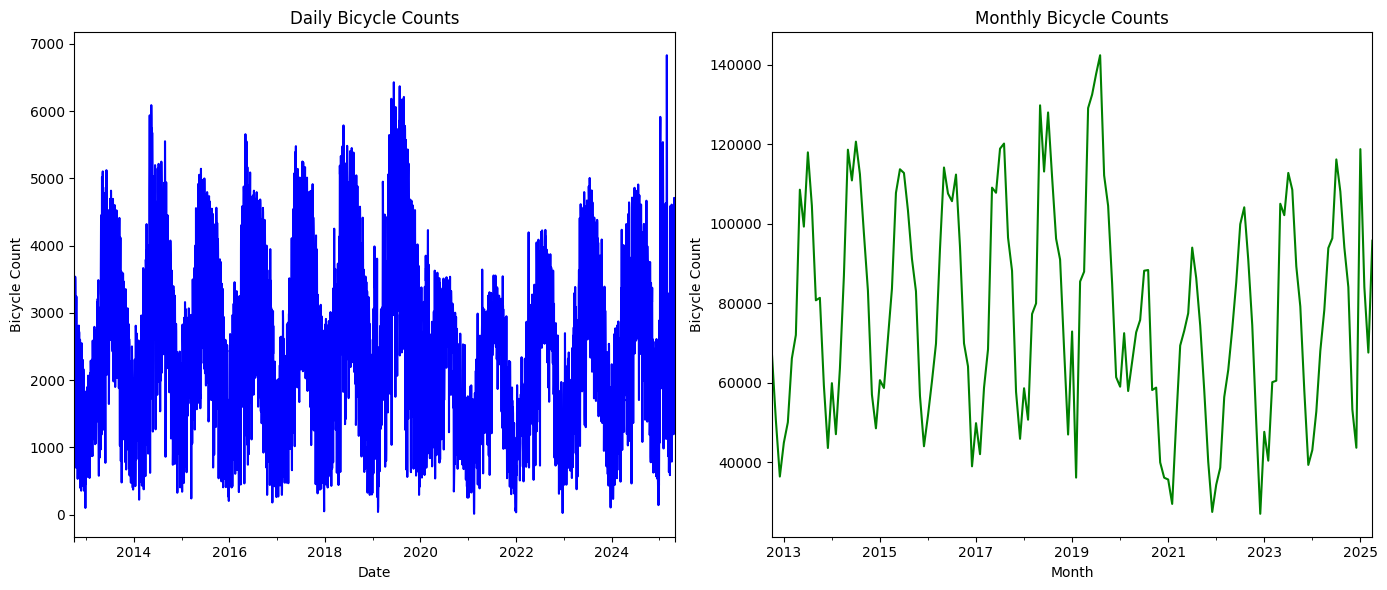

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the Fremont Bridge bike counter data (CSV file)
# You can download the data from: https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month/65db-xm6k
url = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Display basic info
print("Original Data Columns:", df.columns)

# Parse Date col"https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"umn to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Rename columns for easier access
df.columns = ['Fremont Bridge Total', 'East Sidewalk', 'West Sidewalk']

# Fill or drop missing values
df.fillna(0, inplace=True)

# --- Daily Total ---
df['Total'] = df['East Sidewalk'] + df['West Sidewalk']
daily = df['Total'].resample('D').sum()

# --- Monthly Total ---
monthly = df['Total'].resample('M').sum()

# Plotting
plt.figure(figsize=(14, 6))

# Daily Trends
plt.subplot(1, 2, 1)
daily.plot(ax=plt.gca(), title='Daily Bicycle Counts', color='blue')
plt.xlabel('Date')
plt.ylabel('Bicycle Count')

# Monthly Trends
plt.subplot(1, 2, 2)
monthly.plot(ax=plt.gca(), title='Monthly Bicycle Counts', color='green')
plt.xlabel('Month')
plt.ylabel('Bicycle Count')

plt.tight_layout()
plt.show()


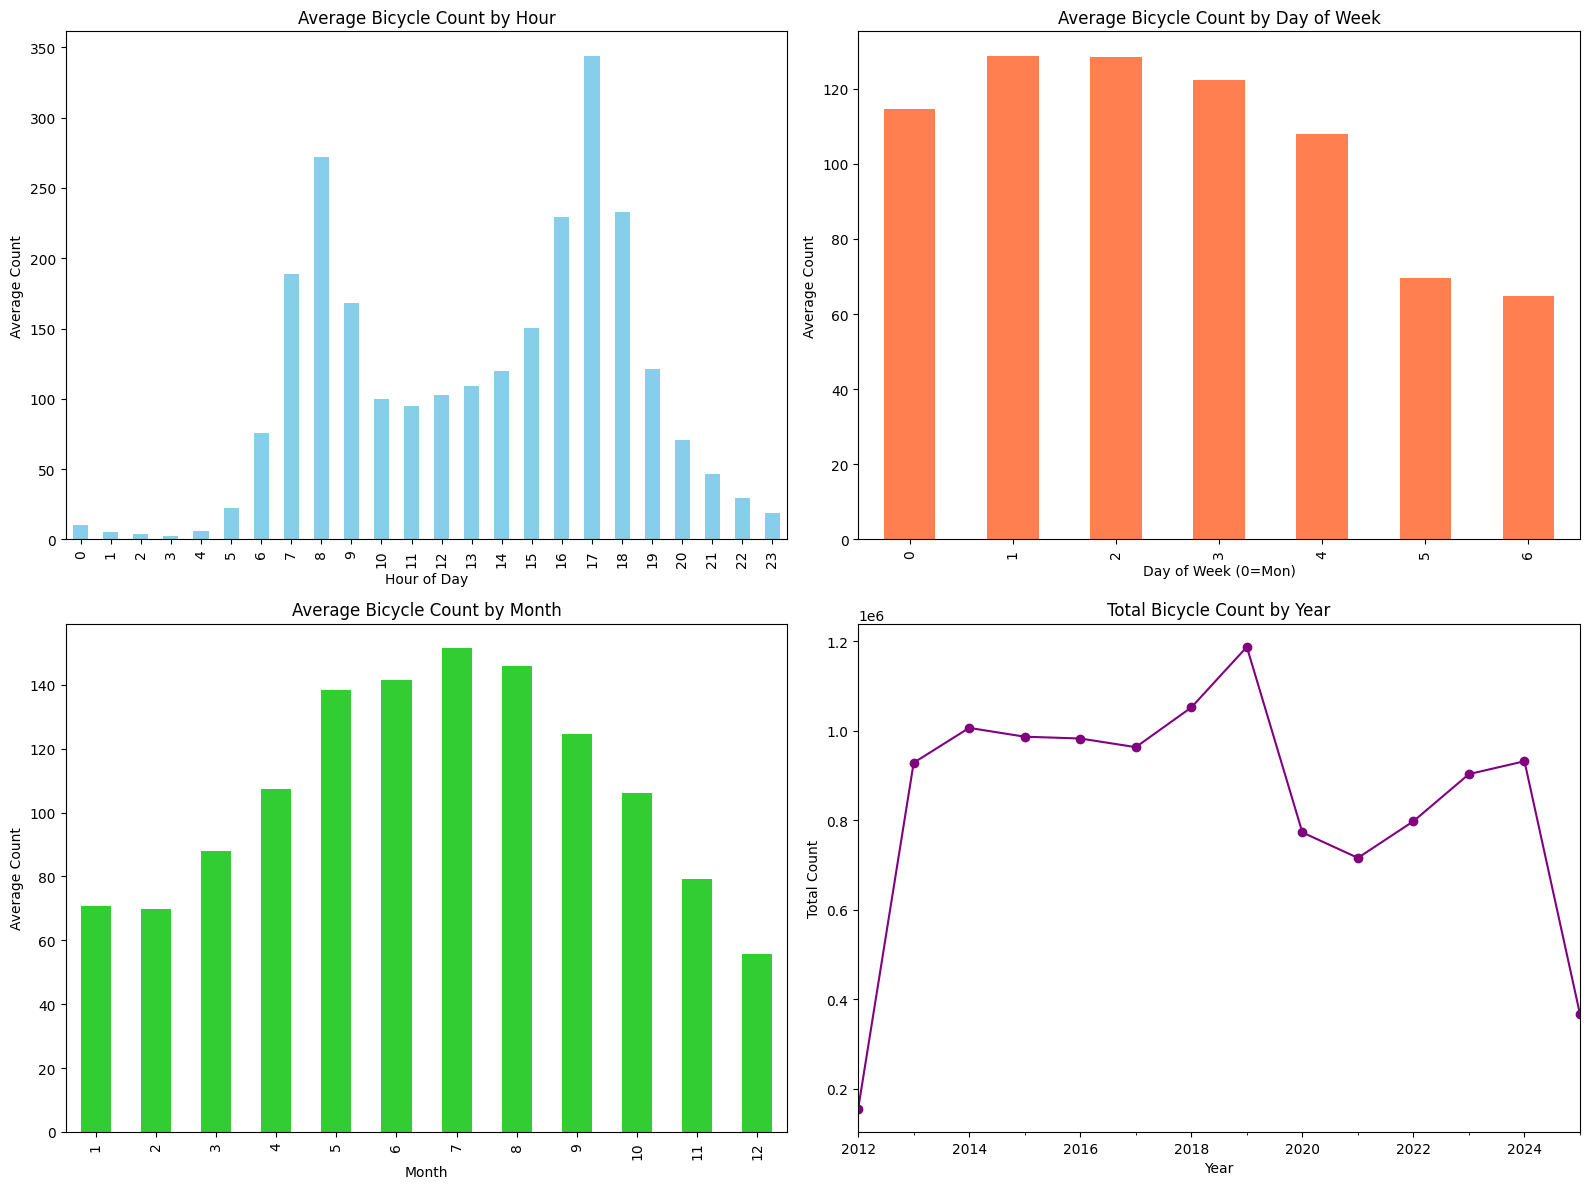

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

# Load the Fremont Bridge data
url = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Rename columns
df.columns = ['Total', 'East', 'West']
df['Total'] = df['East'] + df['West']

# Fill missing values
df.fillna(0, inplace=True)

# ------------------------------
# HOURLY AVERAGE
# ------------------------------
hourly = df.groupby(df.index.hour).mean()

# ------------------------------
# DAY OF WEEK ANALYSIS
# ------------------------------
df['Day of Week'] = df.index.dayofweek  # Monday=0, Sunday=6
dow = df.groupby('Day of Week')['Total'].mean()

# ------------------------------
# MONTHLY SEASONALITY (ALL YEARS)
# ------------------------------
df['Month'] = df.index.month
monthly_seasonality = df.groupby('Month')['Total'].mean()

# ------------------------------
# YEARLY TREND
# ------------------------------
yearly = df['Total'].resample('A').sum()

# ------------------------------
# PLOTTING
# ------------------------------
plt.figure(figsize=(16, 12))

# 1. Hourly Average
plt.subplot(2, 2, 1)
hourly['Total'].plot(kind='bar', color='skyblue')
plt.title('Average Bicycle Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')

# 2. Day of Week
plt.subplot(2, 2, 2)
dow.plot(kind='bar', color='coral')
plt.title('Average Bicycle Count by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Count')

# 3. Monthly Seasonality
plt.subplot(2, 2, 3)
monthly_seasonality.plot(kind='bar', color='limegreen')
plt.title('Average Bicycle Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Count')

# 4. Yearly Trend
plt.subplot(2, 2, 4)
yearly.plot(marker='o', color='purple')
plt.title('Total Bicycle Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Count')

plt.tight_layout()
plt.show()
